## Get the Data

1. Load Libraries
2. Load the data
3. check the data, dimensions, top 5 columns, and type of data

In [531]:
#load librarys
import nltk
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#nlp
from sklearn.feature_extraction.text import TfidfVectorizer


#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import  confusion matrix 
from sklearn.metrics import confusion_matrix


2. Load the data

In [472]:
#load data
data = pd.read_csv("spam.csv")


3. check the data, dimemssions, top 5 columns, type of data

In [473]:
#get data dimenssions
data.shape

(5171, 4)

In [474]:
#show first 5 columns
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [475]:
#show last five columns
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [477]:
#create a copy of X_train and called it train_set
train_set = data.copy()

## Explore the Data

1. Study Features (categorical,numerical, % missing values, noise data)
2. Usefulness
3. Identify Target feature

In [478]:
#check if the categorical values, might be Nominal, Ordinal, or Binary (0,1 or yes,no)
train_set.apply(pd.unique)

Unnamed: 0    [605, 2349, 3624, 4685, 2030, 2949, 2793, 4185...
label                                               [ham, spam]
text          [Subject: enron methanol ; meter # : 988291\r\...
label_num                                                [0, 1]
dtype: object

In [479]:
#check the amount of uniqueness
train_set.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [480]:
#see full text of 1 row, what our main feature looks like
train_set.loc[0,'text']

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [481]:
#see full text of 1 row, what our main feature looks like
train_set.loc[100,'text']

'Subject: help !\r\nbrian ,\r\nwho do i talk to about getting daren farmer a labor distribution report . he\r\nneeds to see what employees are hitting his rc . i know that we have\r\ndiscussed this prior and soem managers are receiving a monthly report but he\r\nis not . who can help us ? ? ?\r\nthank you !\r\nyvette\r\nx 3 . 5953'

In [482]:
#see full text of 1 row, what our main feature looks like
train_set.loc[1340,'text']

'Subject: enron / hpl actuals for october 9 , 2000\r\nteco tap 30 . 000 / enron ; 120 . 000 / hpl iferc'

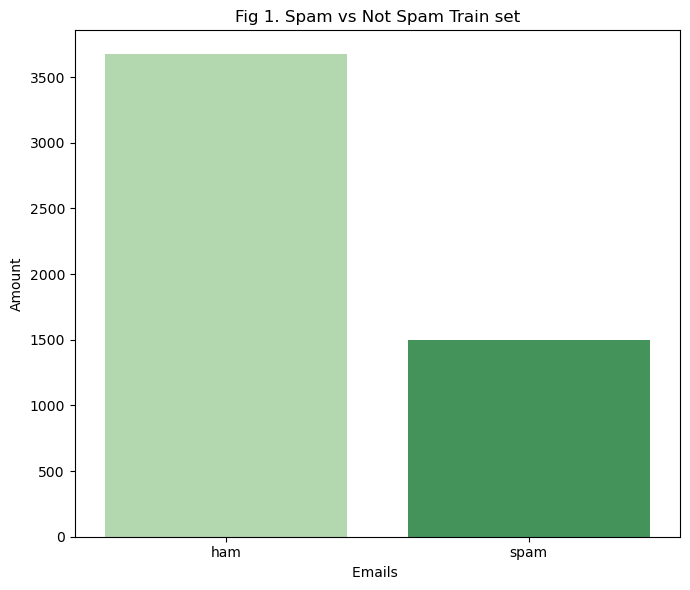

In [483]:
#show amount of spam and not spam email

#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='label', palette='Greens')
#add title
plt.title('Fig 1. Spam vs Not Spam Train set')
# add x label
plt.xlabel('Emails ')
# add y label
plt.ylabel('Amount')
#tight layout
plt.tight_layout()
#show layout
plt.show()

In [484]:
#get the size of each mail
train_set['size'] = train_set['text'].str.len()

In [485]:
train_set.head()

,Unnamed: 0,label,text,label_num,size
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


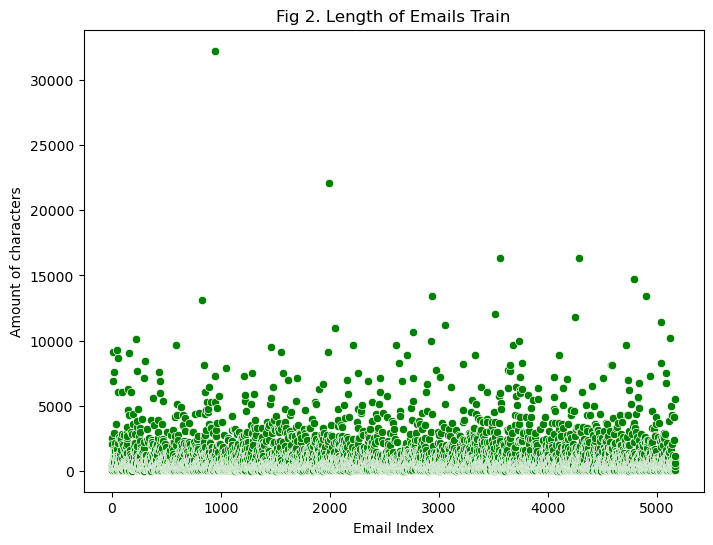

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_set' is your DataFrame containing the email data with the 'size' column representing the length of the text

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(data=train_set, x=train_set.index, y='size', color='green')

# Add title
plt.title('Fig 2. Length of Emails Train')

# Add x-axis label
plt.xlabel('Email Index')

# Add y-axis label
plt.ylabel('Amount of characters')

# Show the plot
plt.show()


2. Usefulness

As we can see, most of our data is textbases,as expected since it is a NLP project, our main feautere to work with will be 'text', since it contains the subject and content of the email

3. Identify Target feature

'label_num'

### III. Prepare data
1. Clean the data:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).
2. Perform feature engineering, where appropriate:
• Discretize continuous features.
• Decompose features (e.g., categorical, date/time, etc.).
• Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
• Aggregate features into promising new features.
3. Perform feature selection (optional):
• Drop the attributes that provide no useful information for the task.
4. Perform feature scaling:
• Standardize or normalize features.

1. Clean the data

In [487]:
#chech null values 
train_set.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
size          0
dtype: int64

In [488]:
#define a class to treat the missing values and outliers

class CleanData:
  #init our class
    def __init__(self, dataset):
        self.dataset = dataset
    pass

    #lower the full text
    def getTextLower(self):
        #using the lower function to lower the full text in the dataset
        self.dataset['text'] = self.dataset['text'].str.lower()
    pass

  #separate text between subject and content
    def getSubject(self):
        #create a new feature in df that adds the subject
        #split the text column and only add the first row to the subject feature
        self.dataset['subject']= self.dataset['text'].str.split('\n').str[0]

        #using replace we take the rows that contains subject and replace the word subject only leaven the content
        self.dataset['subject']= self.dataset['subject'].str.replace('subject','')
    pass

  #separate the text and get the body content
    def getBody(self):
        #create a new feature call body
        #save the content of email in a feature called body, using split we will omit
        #the subject and add all the other parts of the text feature into body
        self.dataset['body']= self.dataset['text'].str.split('\n').str[1:]
        #join the whole body feature
        self.dataset['body']= self.dataset['body'].str.join('\n')
    pass


  #remove any character to subject and body features
    def removeCharacters(self):
        #regex parttern to remove any special character that does not add value to our analysis
        pattern = r'[0-9.\r\n\t#$@,(){}[\]/\+-=_&^*!]'
        #using replace we will remove any character that follows the pattern
        self.dataset['body']= self.dataset['body'].apply(lambda x:re.sub(pattern, '',x))
         #using replace we will remove any character that follows the pattern
        self.dataset['subject']= self.dataset['subject'].apply(lambda x:re.sub(pattern, '',x))

    pass





In [489]:
#call an instance of the CleanData class and
clean = CleanData(train_set)
#put all the text in lower
clean.getTextLower()
#get the subject in a specific feature called subject
clean.getSubject()
#get the body in a specific feature called body
clean.getBody()
#remove any characters that do not add value to our work
clean.removeCharacters()

In [490]:
#apply changes to the train set
train_set= clean.dataset

In [491]:
train_set.head()

,Unnamed: 0,label,text,label_num,size,subject,body
0,605,ham,subject: enron methanol ; meter # : 988291\r\n...,0,327,enron methanol meter,this is a follow up to the note i gave you on ...
1,2349,ham,"subject: hpl nom for january 9 , 2001\r\n( see...",0,97,hpl nom for january,see attached file hplnol xls hplnol xls
2,3624,ham,"subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,neon retreat,ho ho ho we ' re around to that most wonderfu...
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1,414,photoshop windows office cheap main trending,abasements darer prudently fortuitous undergon...
4,2030,ham,subject: re : indian springs\r\nthis deal is t...,0,336,re indian springs,this deal is to book the teco pvr revenue it ...


In [492]:
#for the purporse of training the model we will join our Subject and Body to create a vector 
train_set['email'] = train_set['subject'] + ' ' + train_set['body']


In [493]:
#drop the unnecesary columns 
train_set.drop(columns=['Unnamed: 0','label_num','text','size','subject','body'], inplace=True)


In [494]:
train_set.head() #show five first row

,label,email
0,ham,enron methanol meter this is a follow up ...
1,ham,hpl nom for january see attached file hp...
2,ham,neon retreat ho ho ho we ' re around to that...
3,spam,photoshop windows office cheap main trend...
4,ham,re indian springs this deal is to book the t...


### IV. Select best ML models

1. Validate train and test
2. Identify models to apply 
3. Show feature importance for each model 
4. Show metrics for each model Precision, Recall, Accuracy, AUC, F1 Score


In [495]:

#select target variable
TARGET ='label'

#define X as out entire df
X = train_set
# y as only our targe variable
y= data[TARGET]


In [496]:
#check the values of x
X

,label,email
0,ham,enron methanol meter this is a follow up ...
1,ham,hpl nom for january see attached file hp...
2,ham,neon retreat ho ho ho we ' re around to that...
3,spam,photoshop windows office cheap main trend...
4,ham,re indian springs this deal is to book the t...
...,...,...
5166,ham,put the on the ft the transport volumes decr...
5167,ham,and following noms hpl can ' t take the ...
5168,ham,calpine daily gas nomination >>julie as i me...
5169,ham,industrial worksheets for august activity at...


In [497]:
#drop TARGET COLUMN from train and test  
X.drop(columns=['label'], inplace=True)


#print the dimensions 
print(f"X.shape: {X.shape}")



X.shape: (5171, 1)


In [498]:
#check values of X
X

,email
0,enron methanol meter this is a follow up ...
1,hpl nom for january see attached file hp...
2,neon retreat ho ho ho we ' re around to that...
3,photoshop windows office cheap main trend...
4,re indian springs this deal is to book the t...
...,...
5166,put the on the ft the transport volumes decr...
5167,and following noms hpl can ' t take the ...
5168,calpine daily gas nomination >>julie as i me...
5169,industrial worksheets for august activity at...


In [499]:

# init TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the email feature
X = vectorizer.fit_transform(X['email'])

In [500]:
X
#check X dimension

<5171x63144 sparse matrix of type '<class 'numpy.float64'>'
	with 303388 stored elements in Compressed Sparse Row format>

In [501]:

#during the phase of train and split we will choose a 10% of our data for test and will apply a stratification
#allowing us to get well representation of the population we are working with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y) #stratified sampling based on the target

#print the dimensions for each train and test
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (4395, 63144)
X_test.shape: (776, 63144)
y_train.shape: (4395,)
y_test.shape: (776,)


In [503]:
#with the use of Label Encoder we will change our target variable spam or ham into 0/1
labelEnc = LabelEncoder()
y_train_encoded = labelEnc.fit_transform(y_train)
y_test_encoded = labelEnc.fit_transform(y_test)


#note: as we saw earlier, indeed exist a feature called label_num already with 0/1, but for the project purpose we 
#decide to not take into consideration, as we can apply and learn new techniques 

print(f"y_train_encoded.shape: {y_train_encoded.shape}")
print(f"y_test_encoded.shape: {y_test_encoded.shape}")

y_train_encoded.shape: (4395,)
y_test_encoded.shape: (776,)


In [504]:
#see the result of the encoder 
y_test_encoded


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [533]:
#define a class to try different models 
class MLmodels():
    
    #init class
    def __init__(self, xTrain, xTest, yTrain, yTest):
        self.xTrain=xTrain
        self.xTest=xTest
        self.yTrain=yTrain
        self.yTest=yTest
        
    #show the results of the accurracy of the model between actual and precdiciton
    def showAcurracy(self, actual, pred):
        #calculate the accuracy
        accuracy = accuracy_score(actual, pred)
        #print the accurracy 
        print(f'The Acurracy is: {accuracy} ')
        
        pass
        
    #show the results of the precision of the model between actual and precdiciton
    def showPrecision(self, actual, pred):
        #calculate the precision
        precision = precision_score(actual, pred)
        #print the precision 
        print(f'The Precision is: {precision} ')
        pass
        
    #show the results of the f1 of the model between actual and precdiciton
    def showF1(self, actual, pred):
        #calculate the f1
        f1 = f1_score(actual, pred)
        #print the f1 
        print(f'The f1 is: {f1} ')
        
    #show the results of the recall of the model between actual and precdiciton
    def showRecall(self, actual, pred):
        #calculate the recall
        recall = recall_score(actual, pred)
        #print the recall 
        print(f'The recall is: {recall} ')
        pass
    
    #show the confusion matrix
    def showMatrix(self, actual, pred):
        #confusion matrix
        print(confusion_matrix(actual, pred))
       
        pass
    
         

    #Random forest Classifier 
    def randomForestClass(self):
        #init the model
        randomF = RandomForestClassifier()
        #train the model
        randomF.fit(self.xTrain,  self.yTrain)

        #predcit with train 
        trainPred = randomF.predict(self.xTrain)
        
        #show train metrics
        print('Train Metrics Results:\n')
        #call the functions to calculate the metrics and show the results
        
        self.showAcurracy(self.yTrain,trainPred)
        self.showPrecision(self.yTrain,trainPred)
        self.showRecall(self.yTrain,trainPred)
        self.showF1(self.yTrain,trainPred)
        
        #predict with test 
        testPred = randomF.predict(self.xTest)
        
        #show test metrics
        print('\nTest Metrics Results: \n')
        #call the functions to calculate the metrics and show the results
        self.showAcurracy(self.yTest,testPred)
        self.showPrecision(self.yTest,testPred)
        self.showRecall(self.yTest,testPred)
        self.showF1(self.yTest,testPred)
        
        #show the confusion matrix for test pred 
        self.showMatrix(self.yTest,testPred)
        pass
    
    #Naive Bayes classifier for multinomial models
    def naiveBayesClass(self):
        #init the model
        naivesBayes = MultinomialNB()
        #train the model
        naivesBayes.fit(self.xTrain,  self.yTrain)

        #predcit with train 
        trainPred = naivesBayes.predict(self.xTrain)
        
        #show train metrics
        print(' MultinomialNB Train Metrics Results:\n')
        #call the functions to calculate the metrics and show the results
        
        self.showAcurracy(self.yTrain,trainPred)
        self.showPrecision(self.yTrain,trainPred)
        self.showRecall(self.yTrain,trainPred)
        self.showF1(self.yTrain,trainPred)
        
        #predict with test 
        testPred = naivesBayes.predict(self.xTest)
        
        #show test metrics
        print('\n MultinomialNB Test Metrics Results: \n')
        #call the functions to calculate the metrics and show the results
        self.showAcurracy(self.yTest,testPred)
        self.showPrecision(self.yTest,testPred)
        self.showRecall(self.yTest,testPred)
        self.showF1(self.yTest,testPred)
        
        #show the confusion matrix for test pred 
        self.showMatrix(self.yTest,testPred)
        
        pass
    

  
    

In [534]:
  
#create a instance of the class mlmodels
mlModel = MLmodels(X_train, X_test, y_train_encoded, y_test_encoded)
#call naives bayes classifier
mlModel.naiveBayesClass()
#call random forest classifier 
mlModel.randomForestClass()



 MultinomialNB Train Metrics Results:

The Acurracy is: 0.966325369738339 
The Precision is: 0.999113475177305 
The recall is: 0.8846153846153846 
The f1 is: 0.9383846794338052 

 MultinomialNB Test Metrics Results: 

The Acurracy is: 0.9123711340206185 
The Precision is: 1.0 
The recall is: 0.6977777777777778 
The f1 is: 0.8219895287958116 
[[551   0]
 [ 68 157]]
Train Metrics Results:

The Acurracy is: 1.0 
The Precision is: 1.0 
The recall is: 1.0 
The f1 is: 1.0 

Test Metrics Results: 

The Acurracy is: 0.9806701030927835 
The Precision is: 0.9525862068965517 
The recall is: 0.9822222222222222 
The f1 is: 0.9671772428884026 
[[540  11]
 [  4 221]]
